# Credit Card Fraud Prediction Using 6 Classifiers Algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:xlabel='Class', ylabel='count'>

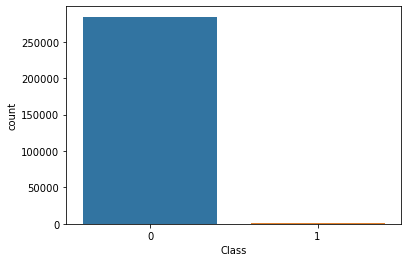

In [5]:
sns.countplot(df['Class'])

In [6]:
df['Class'].value_counts()
# Data is highly unbalanced

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Amount'>

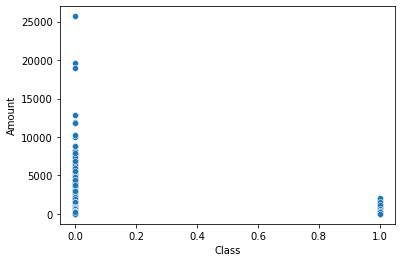

In [7]:
sns.scatterplot(x='Class',y='Amount',data=df)

In [8]:
cor = df.corr()
cor['Class'].sort_values(ascending=True)


V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Class     1.000000
Name: Class, dtype: float64

<AxesSubplot:>

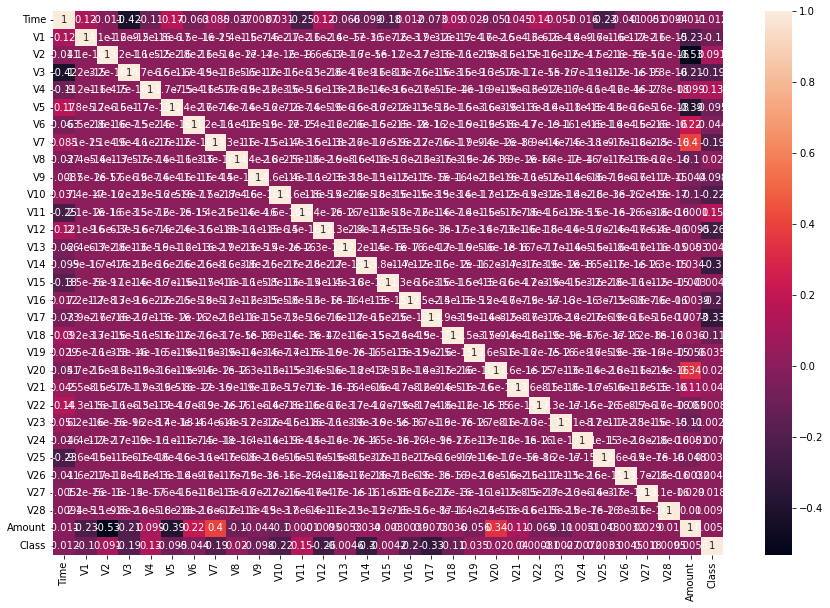

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

In [10]:
y= df.iloc[:,-1]
x= df.iloc[:,:-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)
print('Training Shape is: ',X_train.shape)
print('Testing Shape is: ',X_test.shape)

Training Shape is:  (199364, 30)
Testing Shape is:  (85443, 30)


# Making Piplelines and Fitting models

In [12]:
%%time
pipe_lR = Pipeline([('lR',LogisticRegression())])
pipe_dt = Pipeline([('dt',DecisionTreeClassifier())])
pipe_rf = Pipeline([('rf',RandomForestClassifier(n_estimators=150))])
pipe_sv = Pipeline([('sv',SVC())])
pipe_kn = Pipeline([('kn',KNeighborsClassifier(n_neighbors=50))])
pipe_xg = Pipeline([('xg',XGBRFClassifier())])
pipelines = [pipe_lR,pipe_dt,pipe_rf,pipe_sv,pipe_kn,pipe_xg]
pipe_dict = {0: 'LogisticRegression', 1: 'DecisionTree',2: 'RandomForest', 3: 'SVC', 4: 'KNeighbors', 5: 'XGBRF'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

Wall time: 4min 45s


# Training Accuracy for each Model

In [13]:
%%time
 
for i,model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} Training Accuracy : {model.score(X_train,y_train)}')


LogisticRegression Training Accuracy : 0.9988312834814711

DecisionTree Training Accuracy : 1.0

RandomForest Training Accuracy : 1.0

SVC Training Accuracy : 0.9982544491482915

KNeighbors Training Accuracy : 0.9982544491482915

XGBRF Training Accuracy : 0.9996438674986456
Wall time: 1min 8s


# Testing Accuracy for each Model


In [14]:
%%time
for i,model in enumerate(pipelines):
    print(f'\n{pipe_dict[i]} Testing Accuracy: {model.score(X_test,y_test)}')


LogisticRegression Testing Accuracy: 0.9989232587807076

DecisionTree Testing Accuracy: 0.9991456292499094

RandomForest Testing Accuracy: 0.9995552590615966

SVC Testing Accuracy: 0.9983146659176293

KNeighbors Testing Accuracy: 0.9983146659176293

XGBRF Testing Accuracy: 0.9995318516437859
Wall time: 22.9 s


In [15]:
%%time

for i,model in enumerate(pipelines):
    test_pred = model.predict(X_test)
    print(f'\n{pipe_dict[i]} Confusion Matrix:\n {confusion_matrix(y_test,test_pred)}')
    print(f'\n{pipe_dict[i]} Classification Report:\n {classification_report(y_test,test_pred)}')


LogisticRegression Confusion Matrix:
 [[85259    40]
 [   52    92]]

LogisticRegression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.70      0.64      0.67       144

    accuracy                           1.00     85443
   macro avg       0.85      0.82      0.83     85443
weighted avg       1.00      1.00      1.00     85443


DecisionTree Confusion Matrix:
 [[85262    37]
 [   36   108]]

DecisionTree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.74      0.75      0.75       144

    accuracy                           1.00     85443
   macro avg       0.87      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443


RandomForest Confusion Matrix:
 [[85291     8]
 [   30   114]]

RandomForest Classification Report:
               precision    r

# XGBRF and RandomForest Classification are giving good metric scores.

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay,plot_confusion_matrix

In [17]:
xg = XGBRFClassifier()
rf = RandomForestClassifier(n_estimators=150)

In [18]:
%time
xg.fit(X_train,y_train)
rf.fit(X_train,y_train)
xg_prd = xg.predict(X_test)
rf_prd = rf.predict(X_test)

Wall time: 0 ns


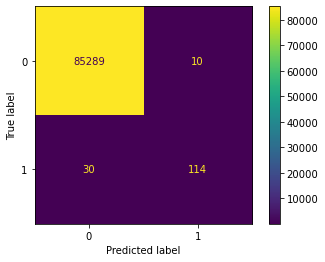

In [19]:
cm1 = confusion_matrix(y_test,xg_prd,labels=xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=xg.classes_,)

disp.plot()

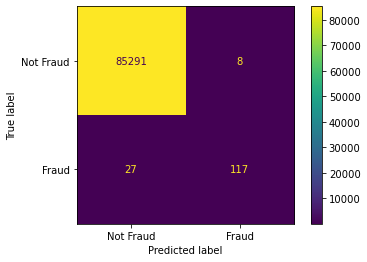

In [20]:
cm2 = confusion_matrix(y_test,rf_prd,labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=['Not Fraud', 'Fraud'])

disp.plot()

In [21]:
from xgboost import XGBClassifier

In [22]:
xgb = XGBClassifier(objective='binary:logistic',missing=1, seed=42)

In [23]:
xgb.fit(X_train,y_train, verbose=True, early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.78270
[1]	validation_0-aucpr:0.78198
[2]	validation_0-aucpr:0.80966
[3]	validation_0-aucpr:0.81381
[4]	validation_0-aucpr:0.81092
[5]	validation_0-aucpr:0.80624
[6]	validation_0-aucpr:0.79868
[7]	validation_0-aucpr:0.79492
[8]	validation_0-aucpr:0.79492
[9]	validation_0-aucpr:0.79856
[10]	validation_0-aucpr:0.80430
[11]	validation_0-aucpr:0.81072
[12]	validation_0-aucpr:0.81501
[13]	validation_0-aucpr:0.82952
[14]	validation_0-aucpr:0.83535
[15]	validation_0-aucpr:0.83295
[16]	validation_0-aucpr:0.83032
[17]	validation_0-aucpr:0.83147
[18]	validation_0-aucpr:0.83649
[19]	validation_0-aucpr:0.83480
[20]	validation_0-aucpr:0.83764
[21]	validation_0-aucpr:0.83687
[22]	validation_0-aucpr:0.83393
[23]	validation_0-aucpr:0.83642
[24]	validation_0-aucpr:0.83806
[25]	validation_0-aucpr:0.83851
[26]	validation_0-aucpr:0.83802
[27]	validation_0-aucpr:0.84077
[28]	validation_0-aucpr:0.84307
[29]	validation_0-aucpr:0.84273
[30]	validation_0-aucpr:0.84229
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=1, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

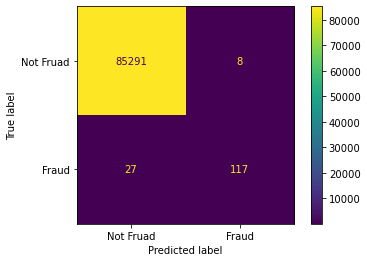

In [24]:
xgb_prd = xgb.predict(X_test)

cm3 = confusion_matrix(y_test,xgb_prd,labels=xgb.classes_)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=['Not Fruad','Fraud'])

disp1.plot()


# XGBClassifier and RandomForest both are giving same result.
Now lets check both on auc and roc

In [25]:
%%time
prob_rf = rf.predict_proba(X_test)
prob_xgb = xgb.predict_proba(X_test)

Wall time: 2.18 s


In [27]:
auc_score_rf = roc_auc_score(y_test,prob_rf[:,1])
auc_score_xgb = roc_auc_score(y_test,prob_xgb[:,1])
print('AUC for RandomForest: ',auc_score_rf)
print('AUC for XGBClassifier: ',auc_score_xgb)

AUC for RandomForest:  0.9458613149691739
AUC for XGBClassifier:  0.9785282262003854


In [28]:
fpr1,tpr1,thresh1 = roc_curve(y_test,prob_rf[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,prob_xgb[:,1],pos_label=1)
random_prob = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test,random_prob,pos_label=1)

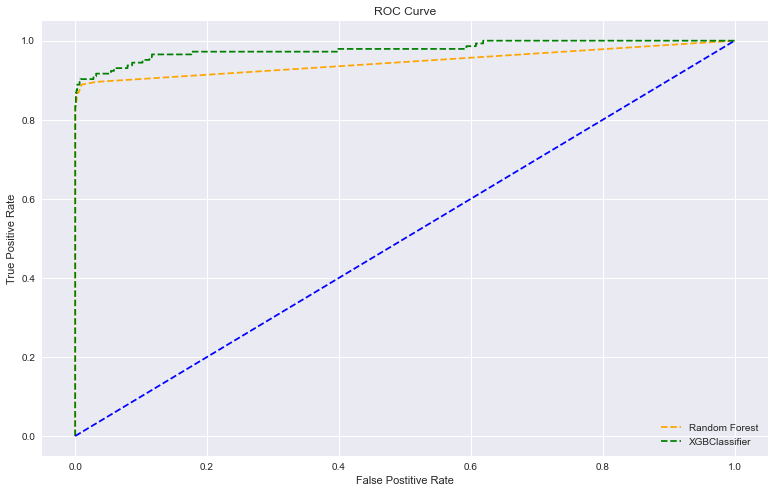

AUC for RandomForest:  0.9458613149691739
AUC for XGBClassifier:  0.9785282262003854


In [37]:
plt.figure(figsize=(13,8))
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Random Forest')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='XGBClassifier')
plt.plot(p_fpr, p_tpr,linestyle='--',color='blue')


plt.title('ROC Curve')

plt.xlabel('False Postitive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('AUC for RandomForest: ',auc_score_rf)
print('AUC for XGBClassifier: ',auc_score_xgb)

# XGBClassifier is giving better performance 
        


In [45]:
#implementing undersampling but we will not fit it in our model.
from imblearn.under_sampling import NearMiss

In [46]:
nm = NearMiss()
X_nm,y_nm = nm.fit_resample(x,y)

In [47]:
X_nm.shape,y_nm.shape

((984, 30), (984,))

In [48]:
from collections import Counter

In [49]:
print('Original DataSet shape {}'.format(Counter(y)))
print('Undersampling Dataset shape {}'.format(Counter(y_nm)))

Original DataSet shape Counter({0: 284315, 1: 492})
Undersampling Dataset shape Counter({0: 492, 1: 492})


Target feature after undersampling 

In [51]:
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 492})


Counter({0: 284315, 1: 492})


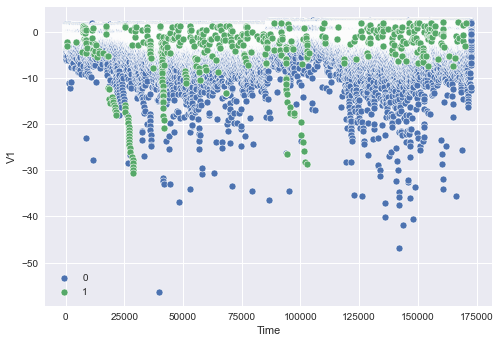

In [74]:
print(counter)
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    sns.scatterplot(x.iloc[row_ix, 0], x.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({0: 492, 1: 492})


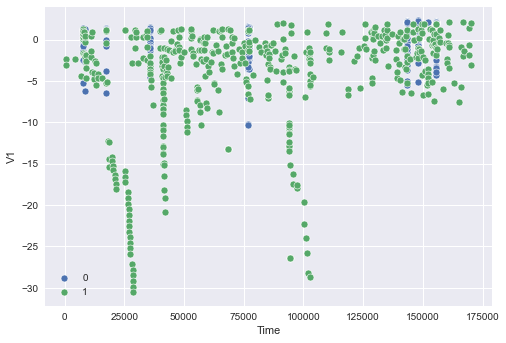

In [75]:
counter1 = Counter(y_nm)
print(counter1)
for label, _ in counter1.items():
    row_ix = np.where(y_nm == label)[0]
    sns.scatterplot(X_nm.iloc[row_ix, 0], X_nm.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
sm = SMOTE()
x_smote, y_smote = sm.fit_resample(x,y)

In [66]:
x_smote.shape,y_smote.shape

((568630, 30), (568630,))

In [67]:
print('Original DataSet shape {}'.format(Counter(y)))
print('Undersampling Dataset shape {}'.format(Counter(y_smote)))

Original DataSet shape Counter({0: 284315, 1: 492})
Undersampling Dataset shape Counter({0: 284315, 1: 284315})


Counter({0: 284315, 1: 284315})


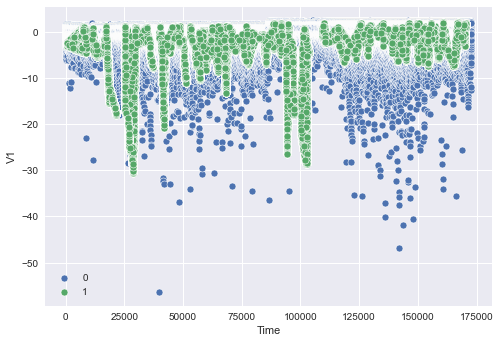

In [73]:
counter1 = Counter(y_smote)
print(counter1)
for label, _ in counter1.items():
    row_ix = np.where(y_smote == label)[0]
    sns.scatterplot(x_smote.iloc[row_ix, 0], x_smote.iloc[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [76]:
from imblearn.under_sampling import RandomUnderSampler

In [88]:
# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps =[('O',over),('U',under)]
# pipeline = Pipeline(steps=steps)


In [89]:
# x_OU,y_OU = pipeline.fit_resample(x,y)

In [90]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size=0.30, random_state=42)

In [99]:
print(X_train_smote.shape,X_test_smote.shape,y_train_smote.shape,y_test_smote.shape)

(398041, 30) (170589, 30) (398041,) (170589,)


In [100]:
print(Counter(y_test_smote))

Counter({1: 85440, 0: 85149})


In [101]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train_smote,y_train_smote)


RandomForestClassifier(n_estimators=150)

In [102]:
rfc_prediction = rfc.predict(X_test_smote)

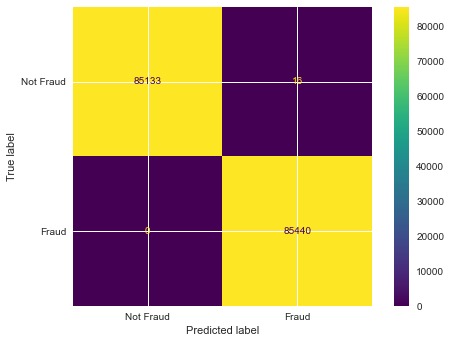

In [133]:
cm3 = confusion_matrix(y_test_smote,rfc_prediction,labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=['Not Fraud', 'Fraud'])

disp.plot()

In [106]:
print(classification_report(y_test_smote,rfc_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [108]:
rfc.score(X_test_smote,y_test_smote)

0.9999062073170016

In [109]:
xgb.fit(X_train_smote,y_train_smote, verbose=True, early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test_smote,y_test_smote)])

[0]	validation_0-aucpr:0.99334
[1]	validation_0-aucpr:0.99486
[2]	validation_0-aucpr:0.99607
[3]	validation_0-aucpr:0.99689
[4]	validation_0-aucpr:0.99774
[5]	validation_0-aucpr:0.99859
[6]	validation_0-aucpr:0.99875
[7]	validation_0-aucpr:0.99904
[8]	validation_0-aucpr:0.99908
[9]	validation_0-aucpr:0.99937
[10]	validation_0-aucpr:0.99945
[11]	validation_0-aucpr:0.99948
[12]	validation_0-aucpr:0.99952
[13]	validation_0-aucpr:0.99955
[14]	validation_0-aucpr:0.99959
[15]	validation_0-aucpr:0.99961
[16]	validation_0-aucpr:0.99973
[17]	validation_0-aucpr:0.99976
[18]	validation_0-aucpr:0.99975
[19]	validation_0-aucpr:0.99983
[20]	validation_0-aucpr:0.99984
[21]	validation_0-aucpr:0.99986
[22]	validation_0-aucpr:0.99989
[23]	validation_0-aucpr:0.99991
[24]	validation_0-aucpr:0.99991
[25]	validation_0-aucpr:0.99992
[26]	validation_0-aucpr:0.99993
[27]	validation_0-aucpr:0.99993
[28]	validation_0-aucpr:0.99993
[29]	validation_0-aucpr:0.99994
[30]	validation_0-aucpr:0.99995
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=1, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

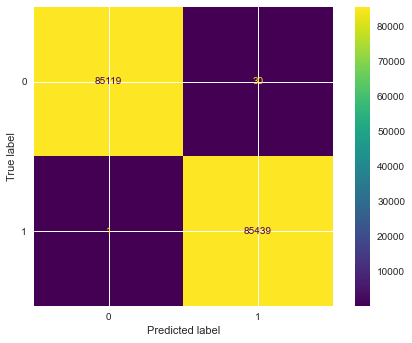

In [137]:
xgb_predicion = xgb.predict(X_test_smote)

cm4 = confusion_matrix(y_test_smote,xgb_predicion,labels=xgb.classes_)

disp = ConfusionMatrixDisplay(cm4)

disp.plot()

In [139]:
print("XGB\n\n",cm4)

print("\n")

print("RandomForest\n",cm3)

XGB

 [[85119    30]
 [    1 85439]]


RandomForest
 [[85133    16]
 [    0 85440]]


In [140]:
rfc_prob = rfc.predict_proba(X_test_smote)
xgb_prob = xgb.predict_proba(X_test_smote)

In [143]:
auc_score_rfc = roc_auc_score(y_test_smote,rfc_prob[:,1])
auc_score_xgb1 = roc_auc_score(y_test_smote,xgb_prob[:,1])
print('AUC for RandomForest: ',auc_score_rfc)
print('AUC for XGBClassifier: ',auc_score_xgb1)

AUC for RandomForest:  0.9999865974913857
AUC for XGBClassifier:  0.9999878360258595
